importando bibliotecas

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

dataframe

In [20]:
cancer = load_breast_cancer()
dt = cancer.data
tg = np.reshape(cancer.target,(569,1))
final_data = np.concatenate([dt,tg],axis=1)
df = pd.DataFrame(final_data)
feats = cancer.feature_names
feat_label = np.append(feats,"Diagnosis")
df.columns = feat_label
print(df.shape)

(569, 31)


In [21]:
y = df["Diagnosis"] #classes
x = df.drop("Diagnosis",axis=1) #atributos

escalando os dados

In [22]:
scale = StandardScaler()
scaled_data = scale.fit_transform(x)
scaled_data_df = pd.DataFrame(scaled_data,columns=feats)
scaled_data_df.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,...,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


matriz de covariância, autovalores e autovetores

In [23]:
cov = scaled_data_df.cov()
autovalores = np.linalg.eigvals(cov)
sorted_array = np.argsort(autovalores)
sorted_values = autovalores[sorted_array]
rslt = sorted_values[-2: ]
print(f"dois maiores autovalores são: {rslt}")

a,v = np.linalg.eig(cov) #retorna autovalores e os autovetores associados a eles
idx = np.argsort(a)[::-1]
a = a[idx]
v = v[:,idx]

dois maiores autovalores são: [ 5.7013746  13.30499079]


fazendo o PCA com 2 componentes principais


In [24]:
pca = PCA(n_components= 2)
pca_data = pca.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(pca_data,columns= ["Principal Component 1","Principal Component 2"])
pca_df.shape


(569, 2)

In [25]:
print(f"Variância dos componentes principais 1 e 2, respectivamente: {pca.explained_variance_ratio_}")

Variância dos componentes principais 1 e 2, respectivamente: [0.44272026 0.18971182]


plotting: verde para câncer maligno e vermelho para câncer benigno

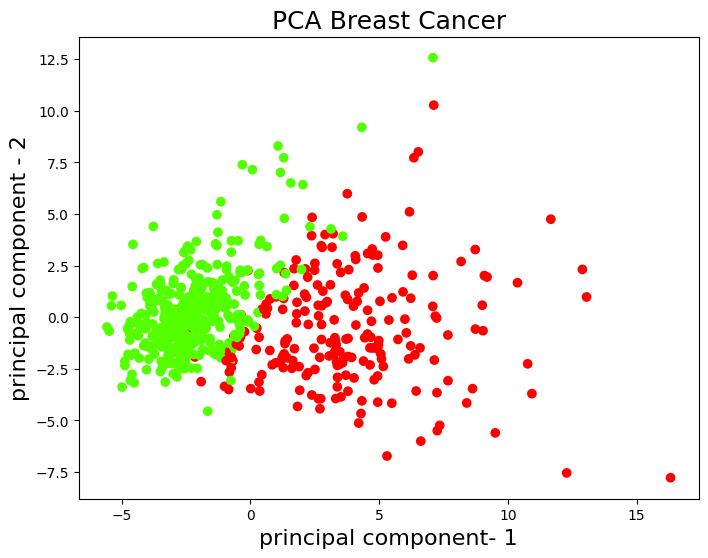

In [26]:

plt.figure(figsize=(8,6))
plt.xlabel("principal component- 1",fontsize = 16)
plt.ylabel("principal component - 2",fontsize = 16)
plt.title("PCA Breast Cancer",fontsize= 18)
plt.scatter(pca_data[:,0],pca_data[:,1],c=cancer["target"],cmap="prism")



In [27]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 